In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv("C:/Users/hope/Desktop/insurance.csv")
print(dataset)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [2]:
print(dataset.shape)

(1338, 7)


In [3]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
print(dataset['sex'].value_counts())

male      676
female    662
Name: sex, dtype: int64


In [5]:
print(dataset['smoker'].value_counts())

no     1064
yes     274
Name: smoker, dtype: int64


In [6]:
print(dataset['region'].value_counts())

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [7]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
print(x)
print(y)

[[19 'female' 27.9 0 'yes' 'southwest']
 [18 'male' 33.77 1 'no' 'southeast']
 [28 'male' 33.0 3 'no' 'southeast']
 ...
 [18 'female' 36.85 0 'no' 'southeast']
 [21 'female' 25.8 0 'no' 'southwest']
 [61 'female' 29.07 0 'yes' 'northwest']]
[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
ct= ColumnTransformer(transformers=[('encoder',OneHotEncoder(sparse=False,drop='first',categories='auto'),[1,4,5])],remainder='passthrough')
x=np.array(ct.fit_transform(x))
pd.DataFrame(x).head()

,0,1,2,3,4,5,6,7
0,0,1,0,0,1,19,27.9,0
1,1,0,0,1,0,18,33.77,1
2,1,0,0,1,0,28,33,3
3,1,0,1,0,0,33,22.705,0
4,1,0,1,0,0,32,28.88,0


In [9]:
x_temp = x[:,1:]
print(x_temp)

[[1.0 0.0 0.0 ... 19 27.9 0]
 [0.0 0.0 1.0 ... 18 33.77 1]
 [0.0 0.0 1.0 ... 28 33.0 3]
 ...
 [0.0 0.0 1.0 ... 18 36.85 0]
 [0.0 0.0 0.0 ... 21 25.8 0]
 [1.0 1.0 0.0 ... 61 29.07 0]]


In [10]:
print(x.shape)

(1338, 8)


In [11]:
const = np.ones((1338,1))
x_temp = np.append(arr = const,values = x_temp, axis = 1)
print(x_temp)

[[1.0 1.0 0.0 ... 19 27.9 0]
 [1.0 0.0 0.0 ... 18 33.77 1]
 [1.0 0.0 0.0 ... 28 33.0 3]
 ...
 [1.0 0.0 0.0 ... 18 36.85 0]
 [1.0 0.0 0.0 ... 21 25.8 0]
 [1.0 1.0 1.0 ... 61 29.07 0]]


In [12]:
x_opt = np.array(x_temp[:,[0,1,2,3,4,5,6,7]],dtype = float)
print(x_opt)

[[ 1.    1.    0.   ... 19.   27.9   0.  ]
 [ 1.    0.    0.   ... 18.   33.77  1.  ]
 [ 1.    0.    0.   ... 28.   33.    3.  ]
 ...
 [ 1.    0.    0.   ... 18.   36.85  0.  ]
 [ 1.    0.    0.   ... 21.   25.8   0.  ]
 [ 1.    1.    1.   ... 61.   29.07  0.  ]]


In [13]:
import statsmodels.api as sm
stats = sm.OLS(endog = y, exog =x_opt).fit()
print(stats.summary())

750
Method:                 Least Squares   F-statistic:                     572.7
Date:                Sat, 17 Oct 2020   Prob (F-statistic):               0.00
Time:                        23:55:09   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1330   BIC:                         2.715e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.199e+04    978.762    -12.250      0.000   -1.39e+04   -1.01e+04
x1          2.384e+04    411.856     57.875      0.000     2.3e+04    2.46e+04
x2          -352.1821    476.120     -0.740      0.460   -1286.211     581.847
x3         -1034.3601    478.537     -2.162     

In [14]:
x_opt = np.array(x_temp[:,[0,1,3,4,5,6,7]],dtype = float)
import statsmodels.api as sm
stats = sm.OLS(endog = y, exog =x_opt).fit()
print(stats.summary())

751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.3
Date:                Sat, 17 Oct 2020   Prob (F-statistic):               0.00
Time:                        23:55:14   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.217e+04    949.538    -12.812      0.000    -1.4e+04   -1.03e+04
x1          2.384e+04    411.659     57.921      0.000     2.3e+04    2.47e+04
x2          -858.4696    415.206     -2.068     

In [15]:
x_opt = np.array(x_temp[:,[0,1,3,5,6,7]],dtype = float)
import statsmodels.api as sm
stats = sm.OLS(endog = y, exog =x_opt).fit()
print(stats.summary())

===
Dep. Variable:                      y   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     799.7
Date:                Sat, 17 Oct 2020   Prob (F-statistic):               0.00
Time:                        23:55:22   Log-Likelihood:                -13550.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1332   BIC:                         2.714e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.228e+04    948.666    -12.940      0.000   -1.41e+04   -1.04e+04
x1          2.385e+04    412.023     57.895     

In [16]:
x_opt = np.array(x_temp[:,[0,1,5,6,7]],dtype = float)
import statsmodels.api as sm
stats = sm.OLS(endog = y, exog =x_opt).fit()
print(stats.summary())

   
Dep. Variable:                      y   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     998.1
Date:                Sat, 17 Oct 2020   Prob (F-statistic):               0.00
Time:                        23:55:31   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1333   BIC:                         2.714e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.21e+04    941.984    -12.848      0.000    -1.4e+04   -1.03e+04
x1          2.381e+04    411.220     57.904     

In [17]:
x_opt = np.array(x_temp[:,[0,1,5,6]],dtype = float)
import statsmodels.api as sm
stats = sm.OLS(endog = y, exog =x_opt).fit()
print(stats.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1316.
Date:                Sat, 17 Oct 2020   Prob (F-statistic):               0.00
Time:                        23:55:38   Log-Likelihood:                -13557.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1334   BIC:                         2.714e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.168e+04    937.569    -12.454      0.0

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test = train_test_split(x_opt,y,test_size = 0.2,random_state=0)
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [19]:
y_pred = reg.predict(x_test)
y_pred

3.76834389,
        4172.66992046,  2507.26410155, 10330.2654426 , 11424.20611237,
        5855.34562237, 17215.68356543, 12166.87695477, 14314.21304449,
        3257.54962765,  5420.54640049, 23921.02663085,  6210.86273411,
        5049.02041645,  5870.4918632 ,  6038.79440937,  4308.47321624,
        9356.50032198,  6138.24954962,  5119.94127449,  5687.24226582,
        2871.45771808,  5484.88145943, 36819.21228609,  1462.89337557,
       12006.18909229,  7875.40592154, 14025.18757037,  6201.32359785,
        4383.12691635, 36581.36595564,  4294.96911179,  2322.52136735,
       15488.14945633, 11754.83865741, 35147.91704643,  4740.60141714,
        6017.211369  , 32250.6106833 ,  6319.657821  ,  2900.53937908,
        7539.08314538,  8590.00673397,  7883.68404709,  5599.36677745,
       12703.71921133, 39407.86752379, 13113.63386651, 28357.24252726,
        6094.25377391, 35923.23613878,  2895.28046369, 12768.94983824,
        8965.69687581,  6897.16139044, 11161.47521523, 14576.5957

In [20]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

32693237.938726153
3960.8666198087053
5717.800096079449


Text(0.5, 0, 'charges')

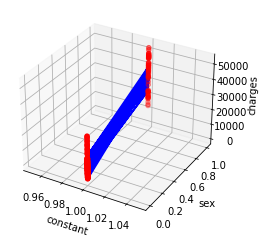

In [21]:
from mpl_toolkits import mplot3d
ax = plt.figure().add_subplot(projection = '3d')
ax.scatter3D(x_test[:,0],x_test[:,1],y_test,c = 'red')
ax.plot3D(x_test[:,0],x_test[:,1],y_pred,c = 'blue')
ax.set_xlabel('constant')
ax.set_ylabel('sex')
ax.set_zlabel('charges')

Text(0.5, 0, 'charges')

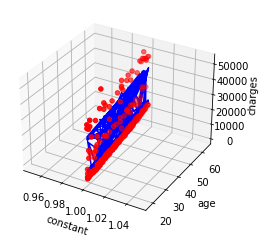

In [22]:
from mpl_toolkits import mplot3d
ax = plt.figure().add_subplot(projection = '3d')
ax.scatter3D(x_test[:,0],x_test[:,-2],y_test,c = 'red')
ax.plot3D(x_test[:,0],x_test[:,-2],y_pred,c = 'blue')
ax.set_xlabel('constant')
ax.set_ylabel('age')
ax.set_zlabel('charges')

Text(0.5, 0, 'charges')

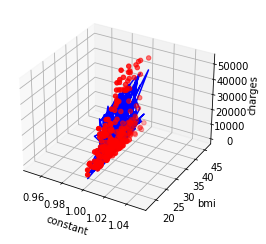

In [23]:
from mpl_toolkits import mplot3d
ax = plt.figure().add_subplot(projection = '3d')
ax.scatter3D(x_test[:,0],x_test[:,-1],y_test,c = 'red')
ax.plot3D(x_test[:,0],x_test[:,-1],y_pred,c = 'blue')
ax.set_xlabel('constant')
ax.set_ylabel('bmi')
ax.set_zlabel('charges')